In [1]:
import tarfile
import os
import csv
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
count_vect = CountVectorizer()

In [2]:
imdb = tarfile.open('aclImdb_v1.tar.gz', 'r')

In [4]:
imdb.extractall()

In [2]:
p_train = []

In [3]:
p_test = []

In [4]:
n_train = []

In [5]:
n_test = []

In [6]:
for i in os.listdir('/Users/macbookpro/Downloads/aclImdb/train/pos'):
    with open('/Users/macbookpro/Downloads/aclImdb/train/pos/' + i, 'r') as f:
        p_train.append(f.read())

In [7]:
for i in os.listdir('/Users/macbookpro/Downloads/aclImdb/train/neg'):
    with open('/Users/macbookpro/Downloads/aclImdb/train/neg/' + i, 'r') as f:
        n_train.append(f.read())

In [8]:
for i in os.listdir('/Users/macbookpro/Downloads/aclImdb/test/pos'):
    with open('/Users/macbookpro/Downloads/aclImdb/test/pos/' + i, 'r') as f:
        p_test.append(f.read())

In [9]:
for i in os.listdir('/Users/macbookpro/Downloads/aclImdb/test/neg'):
    with open('/Users/macbookpro/Downloads/aclImdb/test/neg/' + i, 'r') as f:
        n_test.append(f.read())

In [14]:
train = p_train + n_train

In [15]:
len(train)

25000

In [17]:
test = p_test + n_test

In [18]:
len(test)

25000

In [20]:
X_train_counts = count_vect.fit_transform(train)

In [21]:
X_train_counts.shape

(25000, 74849)

In [23]:
X_test = count_vect.transform(test)

In [24]:
X_test.shape

(25000, 74849)

In [25]:
posneg = [1] * 12500 + [0] * 12500

In [26]:
mn = MultinomialNB().fit(X_train_counts, posneg)

In [27]:
mn_pred = mn.predict(X_test)

In [28]:
def metrics(real, pred):
    tp = 0
    fp = 0
    fn = 0
    for i in range(len(real)):
        r = real[i]
        p = pred[i]
        if r == 1 and p == 1:
            tp += 1
        elif r == 0 and p == 1:
            fp += 1
        elif r == 1 and p == 0:
            fn += 1
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)
    f = (2 * prec * rec) / (prec + rec)
    print(' precision:', prec, '\n', 'recall:', rec, '\n', 'f-measure:', f)  

In [29]:
metrics(mn_pred, posneg)

 precision: 0.7484 
 recall: 0.8605464078741606 
 f-measure: 0.8005648025330537


In [30]:
p = precision_score(mn_pred, posneg)
r = recall_score(mn_pred, posneg)
f = f1_score(mn_pred, posneg)

In [31]:
print(' precision:', p, '\n', 'recall:', r, '\n', 'f-measure:', f)

 precision: 0.7484 
 recall: 0.8605464078741606 
 f-measure: 0.8005648025330537


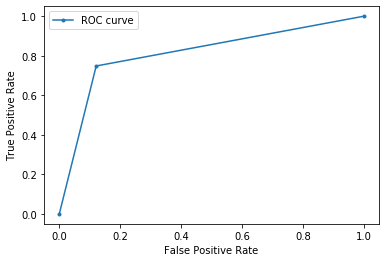

ROC AUC: 0.81356


In [32]:
fpr, tpr, _ = roc_curve(posneg, mn_pred)
plt.plot(fpr, tpr, marker='.', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('ROC AUC:', roc_auc_score(posneg, mn_pred))

In [33]:
logreg = LogisticRegression().fit(X_train_counts, posneg)

/Users/macbookpro/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
logreg_pred = logreg.predict(X_test)

In [35]:
metrics(logreg_pred, posneg)

 precision: 0.8588 
 recall: 0.872622337831247 
 f-measure: 0.8656559954842351


In [36]:
p = precision_score(logreg_pred, posneg)
r = recall_score(logreg_pred, posneg)
f = f1_score(logreg_pred, posneg)

In [37]:
print(' precision:', p, '\n', 'recall:', r, '\n', 'f-measure:', f)

 precision: 0.8588 
 recall: 0.872622337831247 
 f-measure: 0.8656559954842351


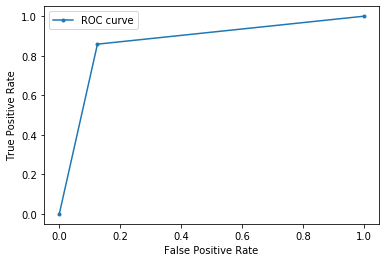

ROC AUC: 0.86672


In [38]:
fpr, tpr, _ = roc_curve(posneg, logreg_pred)
plt.plot(fpr, tpr, marker='.', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('ROC AUC:', roc_auc_score(posneg, logreg_pred))

In [39]:
svm = LinearSVC().fit(X_train_counts, posneg)

/Users/macbookpro/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [41]:
svm_pred = svm.predict(X_test)

In [42]:
metrics(svm_pred, posneg)

 precision: 0.83512 
 recall: 0.8532777505313062 
 f-measure: 0.8441012371634188


In [43]:
p = precision_score(svm_pred, posneg)
r = recall_score(svm_pred, posneg)
f = f1_score(svm_pred, posneg)

In [44]:
print(' precision:', p, '\n', 'recall:', r, '\n', 'f-measure:', f)

 precision: 0.83512 
 recall: 0.8532777505313062 
 f-measure: 0.8441012371634188


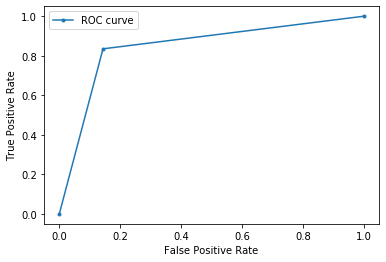

ROC AUC: 0.8457600000000001


In [45]:
fpr, tpr, _ = roc_curve(posneg, svm_pred)
plt.plot(fpr, tpr, marker='.', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print('ROC AUC:', roc_auc_score(posneg, svm_pred))

Лучшей себя показала логистическая регрессия.

In [46]:
logreg_pred_proba = logreg.predict_proba(X_test)

In [56]:
p = {i:logreg_pred_proba[i][1] for i in range(len(logreg_pred_proba))}

In [57]:
indexes = sorted(p.items(), key=lambda x: x[1], reverse=True)[]
print([test[i[0]] for i in indexes])

['Universal Studios version of "Flipper" (1996) is a great heartwarming film for the entire family with good values and sentimentality. It is the story of Sandy Ricks, a teenager from Chicago who reluctantly spends his vacation with his Uncle Porter Ricks in the Bahamas. This ultimately changes the teenagers life and he grows up in the process. He learns to appreciate nature and to have a respect for the environment. I grew up in the 1960\'s and the NBC television show "Flipper" was my favorite childhood show. Elijah Wood is perfectly cast as a 1990\'s Sandy Ricks and gives an excellent performance. As much as I liked the NBC television show and MGM theatrical feature films with Luke Halpin as Sandy in the 1960\'s I liked this feature the best! I feel Elijah Wood is the best Sandy Ricks. With respect to Luke Halpin I feel Elijah Wood has more of a range of acting talent and emotes more as an actor which makes his performance excellent and more believable. I think Elijah Wood is the bes